In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import copy
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from tqdm import tqdm_notebook as tqdm
import folium
from folium import plugins
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_pickle('../datasets/10kSongs_1.pickle')

: 

In [94]:
df.drop('energy', inplace=True, axis=1)
df.drop('danceability', inplace=True, axis=1)

In [95]:
df.shape

(20000, 52)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   analysis_sample_rate        20000 non-null  int32  
 1   artist_7digitalid           20000 non-null  int32  
 2   artist_familiarity          20000 non-null  float64
 3   artist_hotttnesss           20000 non-null  float64
 4   artist_id                   20000 non-null  object 
 5   artist_latitude             20000 non-null  float64
 6   artist_location             20000 non-null  object 
 7   artist_longitude            20000 non-null  float64
 8   artist_mbid                 20000 non-null  object 
 9   artist_mbtags               20000 non-null  object 
 10  artist_mbtags_count         20000 non-null  object 
 11  artist_name                 20000 non-null  object 
 12  artist_playmeid             20000 non-null  int32  
 13  artist_terms                200

In [97]:
pd.set_option('display.max_columns', None)

In [98]:
df.head()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,artist_mbtags_count,artist_name,artist_playmeid,artist_terms,artist_terms_freq,artist_terms_weight,audio_md5,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,release,release_7digitalid,sections_confidence,sections_start,segments_confidence,segments_loudness_max,segments_loudness_max_time,segments_loudness_start,segments_pitches,segments_start,segments_timbre,similar_artists,song_hotttnesss,song_id,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id,year
0,22050,27724,0.559823,0.391484,ARE93YV1187B9937CC,7.36529,Cameroon,12.34344,bc30924c-1900-41c3-9a97-41a93433836f,"[world, folk]","[1, 1]",Baka Beyond,-1,"[world beat, celtic fusion, celtic, kraut rock...","[0.9851092397824193, 0.874540748274432, 0.9254...","[1.0, 0.9164637234765863, 0.8931571460898902, ...",1c8ae38039524eaa4308f855558a6d5a,"[0.125, 0.558, 0.006, 0.011, 0.022, 0.098, 0.1...","[0.84316, 2.61812, 4.49603, 6.21486, 7.97111, ...","[0.964, 0.0, 0.0, 0.93, 1.0, 0.0, 0.5, 1.0, 0....","[0.42014, 0.84316, 1.26806, 1.67483, 2.12183, ...",368.14322,0.000,9,0.588,-11.482,0,0.367,The Meeting Pool,38594,"[1.0, 1.0, 0.904, 0.861, 0.099, 0.017, 0.614, ...","[0.0, 11.17279, 25.84011, 56.48319, 112.57785,...","[1.0, 0.955, 0.995, 0.118, 1.0, 1.0, 1.0, 1.0,...","[-8.92, -30.965, -25.668, -44.018, -6.775, -22...","[0.02885, 0.02209, 0.01565, 0.06153, 0.02228, ...","[-60.0, -46.821, -39.326, -47.073, -46.712, -4...","[[0.959, 1.0, 0.427, 0.403, 0.521, 0.515, 0.48...","[0.0, 0.18866, 0.39351, 1.86635, 2.08698, 3.60...","[[32.03, 94.08, -57.632, 204.93, 51.282, 174.8...","[ARWNGP81187FB4D057, ARR3GAQ1187B98A955, ARDYZ...",0.355286,SOXFJZQ12A6D4F81FB,358.905,"[0.455, 0.435, 0.4, 0.375, 0.362, 0.354, 0.35,...","[0.20916, 0.42014, 0.63112, 0.84316, 1.05454, ...",139.092,4,0.000,Journey (Album Version),412977,TRCCCRP128F147BEFA,1995
1,22050,79,0.783031,0.478411,AR9FKRD1187B9B73D4,51.55503,"Hampstead, London, England",-0.17348,14ed9dea-1bb0-4743-ba32-39674a71da89,[classic pop and rock],[1],Marianne Faithfull,20965,"[rock, pop, indie, england, london, slide, blu...","[1.0, 0.9165031513645518, 0.8708189291912674, ...","[1.0, 0.9597453800580417, 0.9080447810003923, ...",981bdeecf5e625a5cea72bea9be583a4,"[0.388, 0.105, 0.146, 0.945, 0.257, 0.39, 0.93...","[1.45659, 4.58819, 7.71601, 10.84985, 13.97465...","[1.0, 0.599, 0.776, 0.323, 0.764, 0.723, 0.881...","[0.66188, 1.45659, 2.23956, 3.02449, 3.80746, ...",193.80200,0.421,11,0.357,-13.806,0,0.334,Vagabond Ways,29054,"[1.0, 0.662, 0.436, 0.261, 0.44, 0.081, 0.343,...","[0.0, 8.49898, 17.17546, 45.03405, 56.99639, 7...","[0.0, 1.0, 1.0, 0.478, 0.541, 0.213, 0.535, 0....","[-58.807, -44.962, -18.518, -22.068, -17.772, ...","[0.41406, 0.09656, 0.11999, 0.16439, 0.04683, ...","[-60.0, -58.82, -45.523, -27.385, -23.952, -26...","[[0.806, 0.84, 0.596, 0.466, 0.656, 0.866, 0.8...","[0.0, 0.42091, 0.54853, 0.7888, 1.0215, 1.1612...","[[0.033, 170.422, 8.519, -29.436, 56.72, -50.2...","[AREQIT21187B9AEB7F, ARVP8T61187B9A6A2B, AR3DX...",0.396905,SOJEIKW12A6D4F762B,183.281,"[0.613, 0.608, 0.57, 0.539, 0.516, 0.493, 0.47...","[0.66188, 1.06217, 1.45659, 1.84906, 2.23956, ...",76.595,4,0.595,Great Expectations,319733,TRCCZOW128F146A22D,1999
2,22050,368022,0.635055,0.394375,AR0BO8O1187B992CC1,53.64746,"Huddersfield, UK",-1.79723,5540499f-8ab5-404f-a781-e959b1dc2778,[thrash metal],[1],Evile,160447,"[modern rock, death metal, speed metal, thrash...","[0.9751047532365927, 0.9808806930131777, 0.847...","[1.0, 0.8836416145103227, 0.8812962000440431, ...",8f74553fbc3090f7c37be59db65b8a75,"[0.083, 0.163, 0.129, 0.113, 0.701, 0.071, 0.6...","[0.46478, 1.60597, 2.76706, 3.95467, 5.14524, ...","[0.762, 0.146, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.17137

In [99]:
df.tail()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,artist_mbtags_count,artist_name,artist_playmeid,artist_terms,artist_terms_freq,artist_terms_weight,audio_md5,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,release,release_7digitalid,sections_confidence,sections_start,segments_confidence,segments_loudness_max,segments_loudness_max_time,segments_loudness_start,segments_pitches,segments_start,segments_timbre,similar_artists,song_hotttnesss,song_id,start_of_fade_out,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id,year
19995,22050,7149,0.867542,0.525758,ARWDPT81187B99C656,50.82821,"Brighton, United Kingdom",-0.13449,f82f3a3e-29c2-42ca-b589-bc5dc210fa9e,"[rock and indie, united kingdom]","[1, 1]",The Kooks,3977,"[indie pop, indie rock, rock, england, garage ...","[0.9479841156340745, 0.9479378595893738, 1.0, ...","[1.0, 0.9596175561017887, 0.9257372061845779, ...",c1d958344e2b359f73c92ba98cf78963,"[0.079, 0.165, 0.063, 0.036, 0.47, 0.147, 0.09...","[0.41548, 2.03064, 3.64339, 5.24584, 6.84317, ...","[0.697, 0.512, 0.468, 0.523, 0.591, 0.631, 0.5...","[0.41548, 0.81778, 1.22462, 1.62691, 2.03064, ...",215.35302,0.183,5,0.310,-9.057,1,0.446,I Love You_ Beth Cooper (Music From The Motion...,551860,"[1.0, 0.23, 0.645, 0.876, 0.558, 0.191, 0.725,...","[0.0, 18.03956, 67.28488, 90.27285, 117.53539,...","[0.0, 1.0, 1.0, 0.626, 0.386, 0.843, 1.0, 0.09...","[-60.0, -11.732, -14.124, -15.356, -18.825, -1...","[0.0, 0.03381, 0.03313, 0.03855, 0.02909, 0.03...","[-60.0, -60.0, -35.962, -23.253, -23.249, -27....","[[1.0, 0.759, 0.499, 0.438, 0.468, 0.447, 0.45...","[0.0, 0.18281, 0.98503, 1.19356, 1.40689, 1.58...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...","[ARM0P6Z1187FB4D466, ARCNIA01187FB3D245, ARVAC...",0.943699,SOPKQGW12AAF3B17AB,207.621,"[0.884, 0.82, 0.775, 0.745, 0.724, 0.678, 0.64...","[0.2108, 0.41548, 0.61512, 0.81778, 1.02245, 1...",151.493,4,0.682,Sway,6101889,TRFRSPE128F9333799,2008
19996,22050,12774,0.721166,0.440824,ARPAK761187FB4096B,51.50632,"London, England",-0.12714,03cfb17e-9d4a-462c-88ee-1fa348bc3a0d,[rock and indie],[1],The Rifles,-1,"[british pop, indie rock, british invasion, ga...","[0.881539244584874, 1.0, 0.7801481227366694, 0...","[1.0, 0.9480940872298133, 0.9134217612466646, ...",27230a211fadc489abd0c596e49d1204,"[0.182, 0.273, 0.087, 0.661, 0.1, 0.362, 0.603...","[1.57946, 4.08253, 6.58863, 9.11851, 11.68428,...","[0.427, 0.472, 0.518, 0.567, 0.039, 0.182, 0.2...","[0.95689, 1.57946, 2.20385, 2.83008, 3.45631, ...",171.54567,0.000,9,0.651,-4.294,1,0.560,Local Boy,308146,"[1.0, 0.899, 0.234, 0.222, 0.37, 0.528, 0.517,...","[0.0, 4.08253, 33.25577, 65.54595, 76.51334, 8...","[1.0, 1.0, 1.0, 1.0, 0.966, 1.0, 1.0, 1.0, 0.6...","[-15.885, -7.135, -15.848, -8.046, -14.417, -8...","[0.73766, 0.03741, 0.02246, 0.02617, 0.01833, ...","[-60.0, -46.727, -38.254, -35.55, -31.528, -40...","[[0.667, 0.836, 1.0, 0.951, 0.799, 0.818, 0.70...","[0.0, 1.0117, 1.45478, 1.63379, 1.93088, 2.232...","[[4.649, 147.149, 45.234, -149.792, 38.117, -8...","[ARN0SSH1187FB4EF8B, AR2PVVF1187FB3F333, AR1PN...",0.671410,SOMQDMH12A8C13E2CE,161.123,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.95689, 1.26817, 1.57946, 1.89074, 2.20385, ...",95.246,4,0.655,Local Boy,3465544,TRFRSQL128F42AC9DB,2003
19997,22050,226116,0.569276,0.334558,AR9IIVS1187FB566F1,41.88415,"Chicago, IL",-87.63241,d85122eb-7738-4608-86ec-7d4b09605e7d,[folk],[1],Alice Peacock,9573,"[country rock, folk-pop, folk rock, singer-son...","[0.9241601840170579, 0.9152735569222029, 0.994...","[1.0, 0.9927788464339466, 0.988079687538292, 0...",ae37e12d7add51bb77a97f79a32e543f,"[0.033, 0.039, 0.231, 0.232, 0.023, 0.001, 0.0...","[0.784, 2.12468, 3.45977, 4.79791, 6.13604, 7....","[0.816, 0.41, 0.585, 0.392, 0.406, 0.382

In [100]:
df.describe()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,artist_playmeid,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,release_7digitalid,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_7digitalid,year
count,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000
mean,22050.0,59736.399150,0.658526,0.451967,41.729697,-45.616900,24905.718150,244.758911,0.907540,5.302100,0.450192,-10.148292,0.674300,0.480916,317453.310950,0.466749,235.178549,124.897426,3.601900,0.503718,3.528192e+06,1996.898650
std,0.0,94337.284936,0.103677,0.082851,16.117322,56.359308,43470.713262,115.179208,2.146168,3.588116,0.278258,5.120255,0.468648,0.192650,233725.794951,0.207622,112.629457,34.998190,1.231825,0.370862,2.599764e+06,11.119836
min,22050.0,-1.000000,0.000000,0.000000,-45.874500,-159.540540,-1.000000,2.298320,0.000000,0.000000,0.000000,-44.286000,0.000000,0.000000,39.000000,0.000000,2.298000,0.000000,0.000000,0.000000,4.430000e+02,1929.000000
25%,22050.0,5681.500000,0.595096,0.397687,37.221938,-87.632410,-1.000000,181.655060,0.000000,2.000000,0.224000,-12.824500,0.000000,0.365000,110126.750000,0.349120,173.377000,99.077500,3.000000,0.103000,1.156470e+06,1992.000000
50%,22050.0,18875.000000,0.648199,0.444541,42.284740,-73.808170,2993.000000,228.753830,0.212000,5.000000,0.470000,-9.197500,1.000000,0.493000,286337.000000,0.496175,219.004500,121.798500,4.000000,0.542000,3.221752e+06,2000.000000
75%,22050.0,65104.000000,0.721520,0.495863,51.506320,-0.127140,30756.000000,283.924440,0.462000,9.000000,0.660000,-6.362750,1.000000,0.611000,511268.750000,0.612041,272.933000,145.939000,4.000000,0.850000,5.674990e+06,2006.000000
max,22050.0,603509.000000,0.948290,0.969246,69.651020,175.471310,242965.000000,2502.739140,62.764000,11.000000,1.000000,0.402000,1.000000,1.000000,823409.000000,1.000000,2495.054000,252.943000,7.000000,1.000000,9.088514e+06,2010.000000


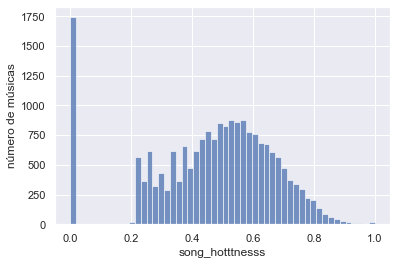

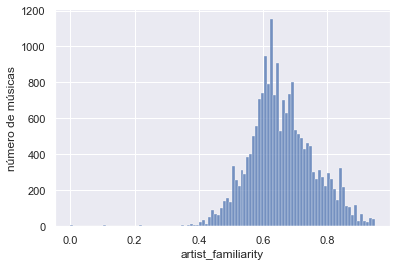

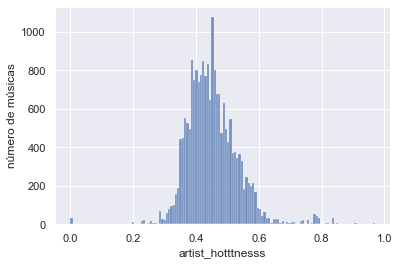

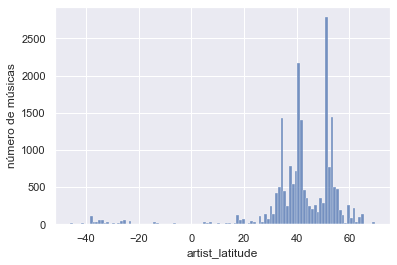

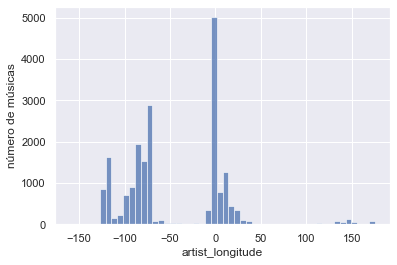

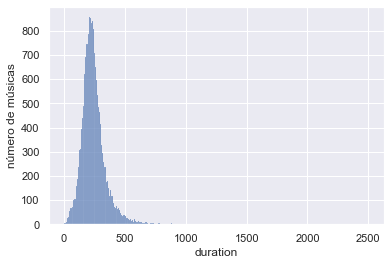

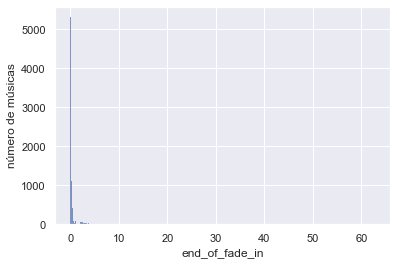

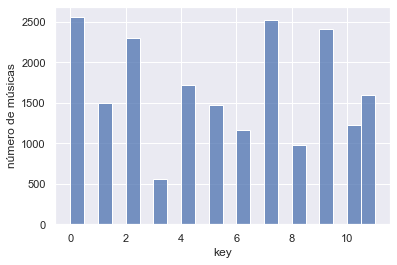

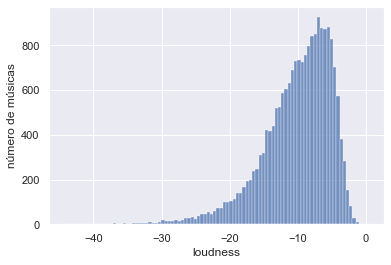

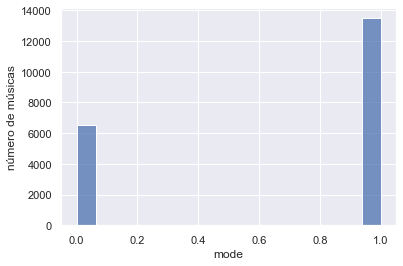

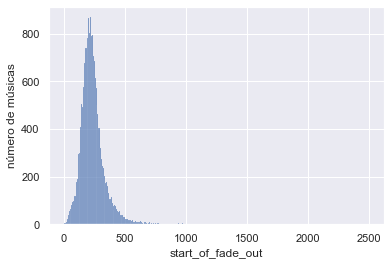

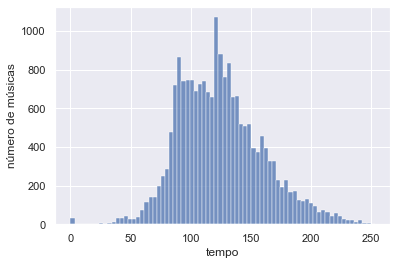

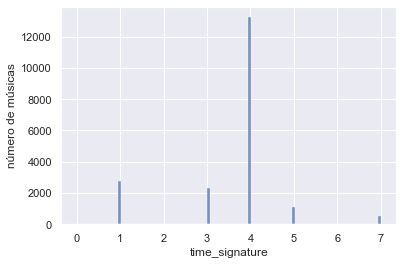

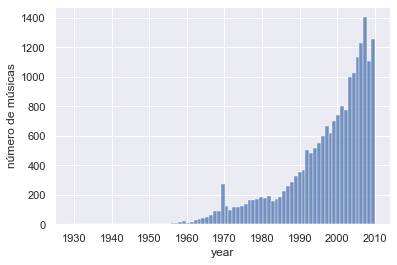

In [101]:
list_features = ['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_latitude', 'artist_longitude', 'duration', 'end_of_fade_in', 'key', 'loudness', 'mode', 'start_of_fade_out', 'tempo', 'time_signature', 'year']

for feature in list_features:
    hist = sns.histplot(df[feature])
    hist.set(ylabel='número de músicas')
    plt.show()

In [102]:
(df['song_hotttnesss'] == 0).sum()

1742

In [103]:
df.drop(df[df['song_hotttnesss'] == 0].index, inplace = True)

In [104]:
df.describe()

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,artist_playmeid,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,release_7digitalid,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_7digitalid,year
count,18258.0,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,18258.000000,1.825800e+04,18258.000000
mean,22050.0,59208.836565,0.665334,0.456761,41.878162,-45.457185,24605.838810,244.237047,0.909545,5.307098,0.450661,-9.991271,0.671322,0.481359,316118.360061,0.511282,234.663333,125.168865,3.609870,0.504331,3.512974e+06,1997.103571
std,0.0,93386.549596,0.101944,0.082214,16.015960,56.497760,43473.744976,111.236188,2.130924,3.590847,0.277911,5.071584,0.469745,0.192482,233688.009216,0.156365,108.591281,35.009669,1.226457,0.371032,2.599849e+06,11.048557
min,22050.0,-1.000000,0.000000,0.000000,-45.874500,-157.857620,-1.000000,5.067300,0.000000,0.000000,0.000000,-43.101000,0.000000,0.000000,39.000000,0.188549,5.067000,0.000000,0.000000,0.000000,4.430000e+02,1929.000000
25%,22050.0,5610.000000,0.601007,0.402655,37.271880,-87.632410,-1.000000,182.046890,0.000000,2.000000,0.225000,-12.644000,0.000000,0.365000,109870.750000,0.399771,174.074000,99.248000,3.000000,0.103000,1.149840e+06,1992.000000
50%,22050.0,18911.500000,0.655126,0.449201,42.312560,-73.726840,2456.000000,228.806080,0.206000,5.000000,0.471000,-8.998000,1.000000,0.493000,285474.500000,0.517417,219.106000,121.927500,4.000000,0.542000,3.212028e+06,2000.000000
75%,22050.0,64232.000000,0.730242,0.499826,51.506320,-0.127140,29421.000000,283.480360,0.467000,9.000000,0.660000,-6.233250,1.000000,0.611000,509840.000000,0.623037,272.431000,146.172750,4.000000,0.850000,5.669676e+06,2006.000000
max,22050.0,603509.000000,0.948290,0.969246,69.651020,175.471310,242965.000000,2502.739140,62.764000,11.000000,1.000000,0.402000,1.000000,1.000000,823409.000000,1.000000,2495.054000,252.943000,7.000000,1.000000,9.088514e+06,2010.000000


In [92]:
df.describe().to_csv("describe.csv")

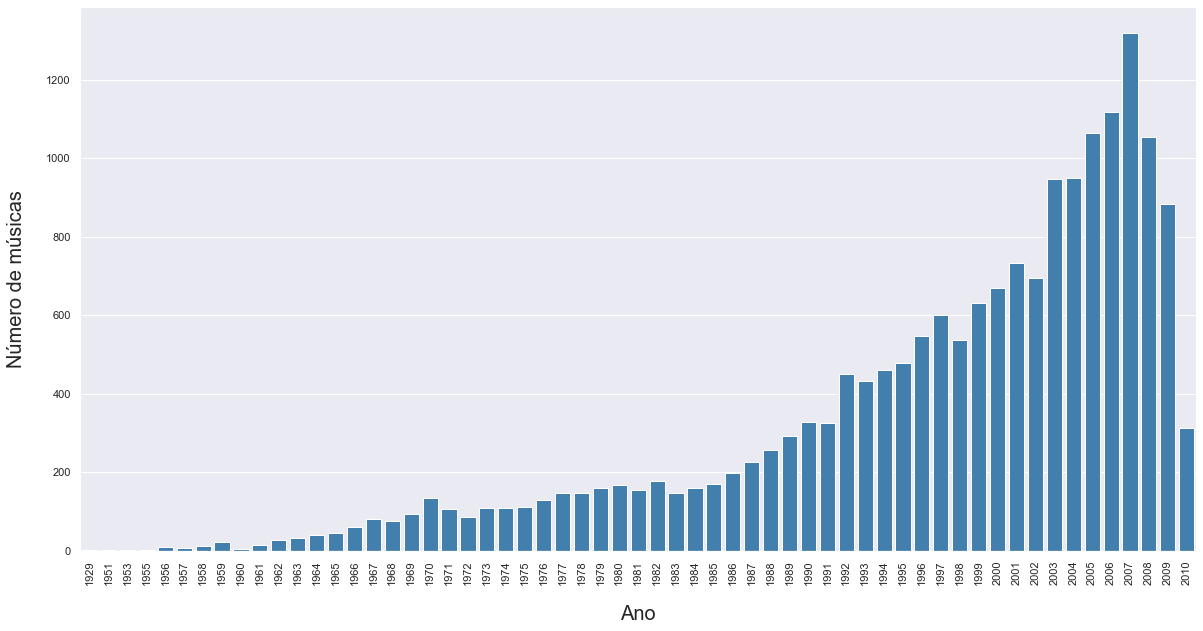

In [105]:
#Plot distribution by year
df_year = df.groupby('year').count()

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plot = sns.barplot(x=df_year.index, y=df_year.key, color='#3182bd')
#plot.set_title('Distribuição do dataset ao longo dos anos', fontsize= 25 )
plot.set_ylabel('Número de músicas', fontsize=20, labelpad=20)
plot.set_xlabel('Ano', fontsize=20, labelpad=20)
plt.show()

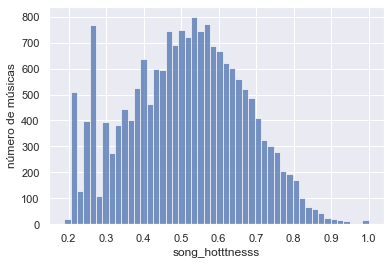

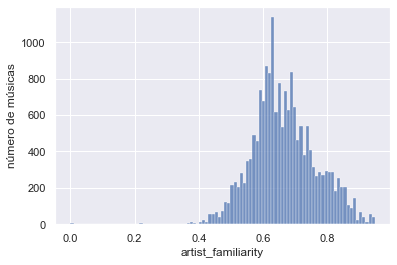

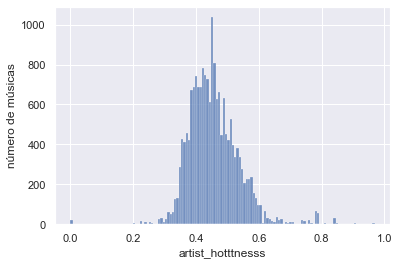

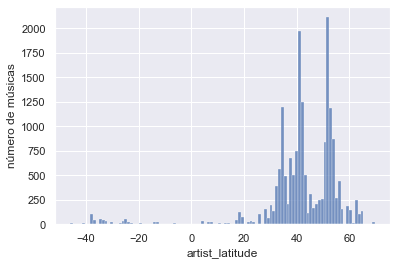

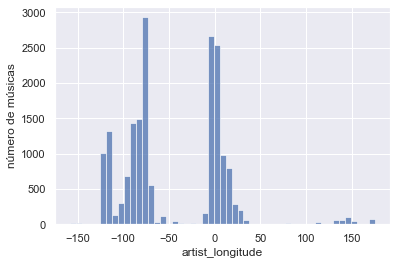

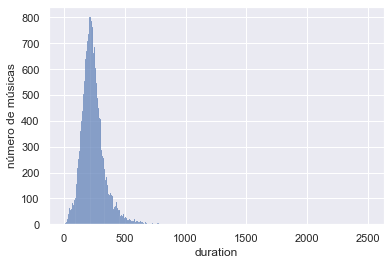

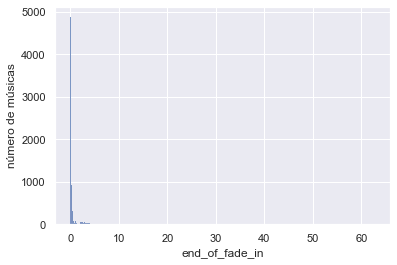

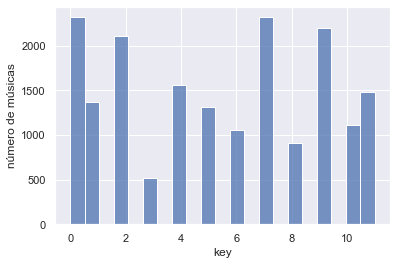

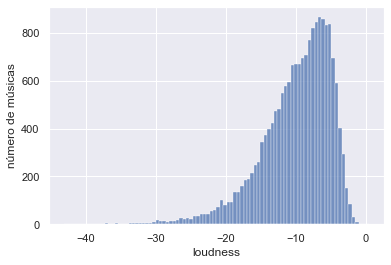

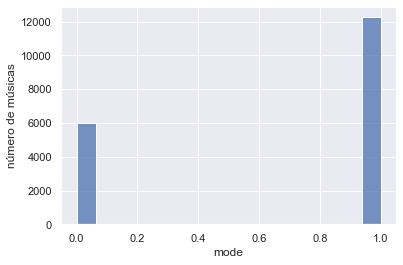

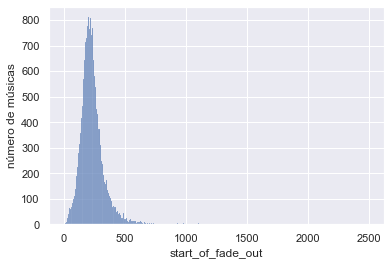

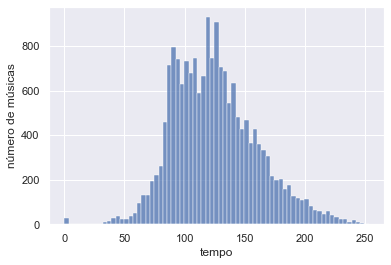

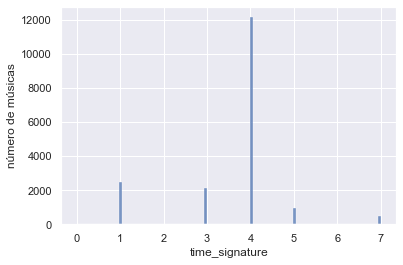

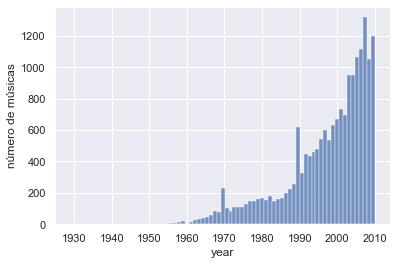

In [106]:
list_features = ['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_latitude', 'artist_longitude', 'duration', 'end_of_fade_in', 'key', 'loudness', 'mode', 'start_of_fade_out', 'tempo', 'time_signature', 'year']

for feature in list_features:
    hist = sns.histplot(df[feature])
    hist.set(ylabel='número de músicas')
    plt.show()

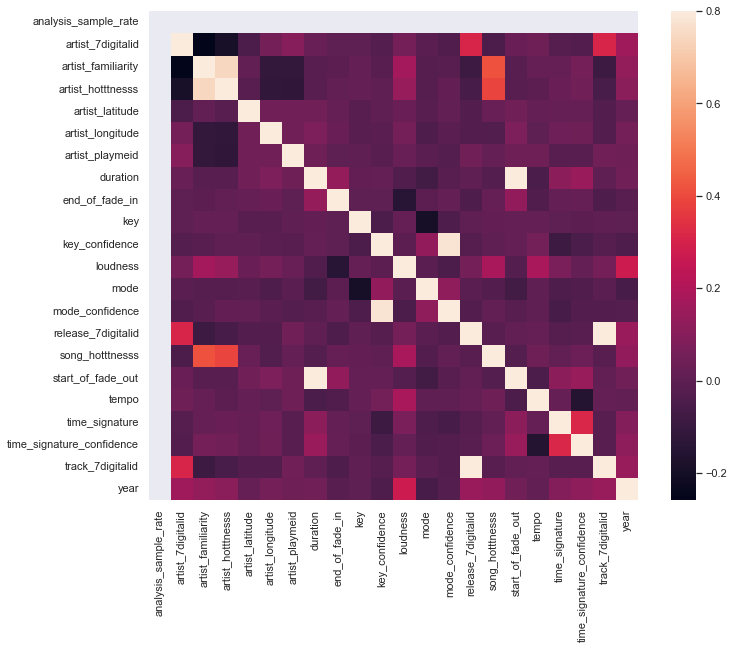

In [146]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, vmax = 0.8 #annot = True
           );

(0.4186037943844278, 0.0)

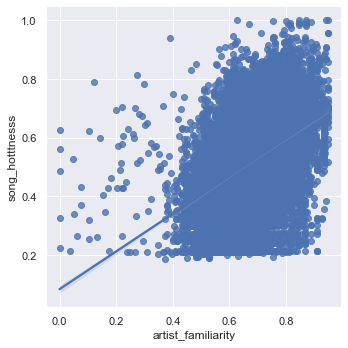

In [112]:
sns.lmplot(x="artist_familiarity", y="song_hotttnesss", data=df);
stats.pearsonr(df['song_hotttnesss'], df['artist_familiarity'])

#Pearson correlation coefficient
#A p-value. This is the probability that the true value of r is zero (no correlation).
#A distribuição das variáveis deve ser semelhante à curva normal.

(0.3895891005392266, 0.0)

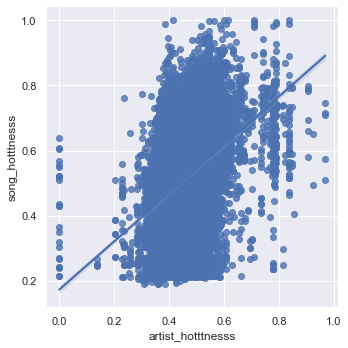

In [108]:
sns.lmplot(x="artist_hotttnesss", y="song_hotttnesss", data=df);
stats.pearsonr(df['song_hotttnesss'], df['artist_hotttnesss'])

(0.1814438586758849, 6.381395002296521e-135)

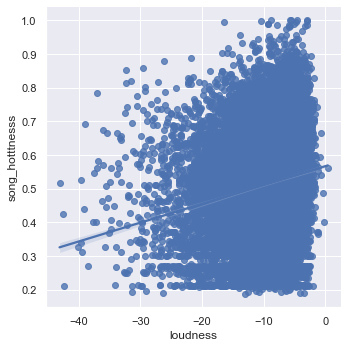

In [109]:
sns.lmplot(x="loudness", y="song_hotttnesss", data=df);
stats.pearsonr(df['song_hotttnesss'], df['loudness'])

(0.12638648985408496, 6.822043643402778e-66)

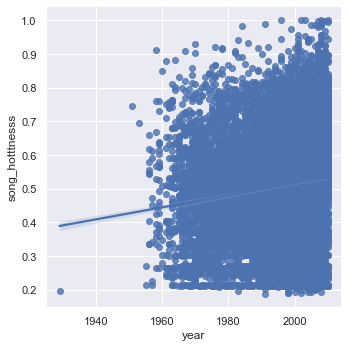

In [110]:
sns.lmplot(x="year", y="song_hotttnesss", data=df);
stats.pearsonr(df['song_hotttnesss'], df['year'])

In [114]:
cat_year = pd.cut(df['year'],bins=[1900,1959,1969,1979,1989,1999,2010],labels=['1920 a 1959', 'anos 60', 'anos 70', 'anos 80', 'anos 90', 'anos 2000'])
df.insert(52,'cat_year',cat_year)

In [115]:
cat_duration = pd.cut(df['duration'],bins=[0,100,200,300,400,500,600,2500],labels=['até 100', 'entre 101 e 200', 'entre 201 e 300', 'entre 301 e 400', 'entre 401 e 500', 'entre 501 e 600', 'entre 601.e 2500'])
df.insert(53,'cat_duration',cat_duration)

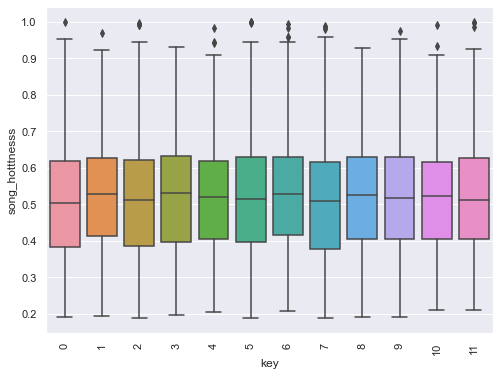

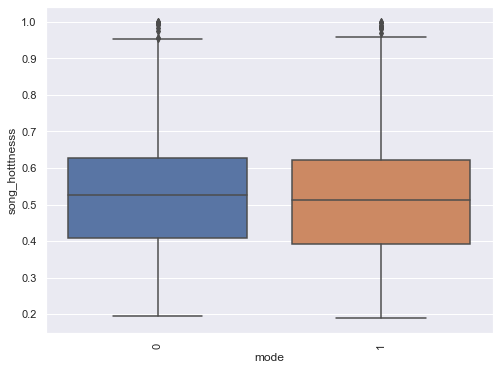

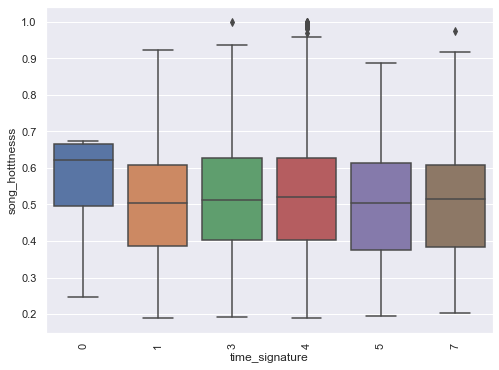

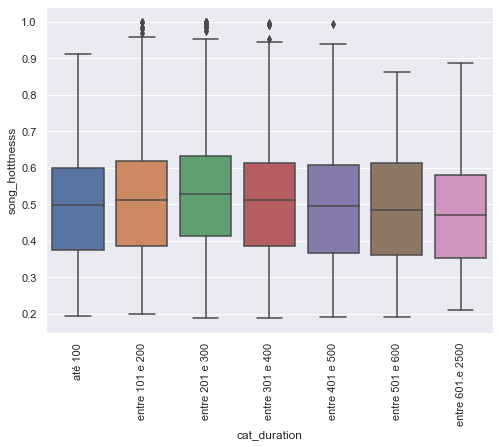

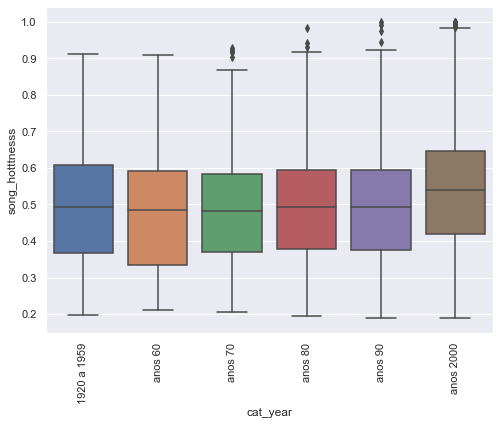

In [125]:
list_features = ['key', 'mode', 'time_signature', 'cat_duration', 'cat_year']

for feature in list_features:
    data = pd.concat([df['song_hotttnesss'], df[feature]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    plt.xticks(rotation=90)
    fig = sns.boxplot(x=feature, y="song_hotttnesss", data=data)

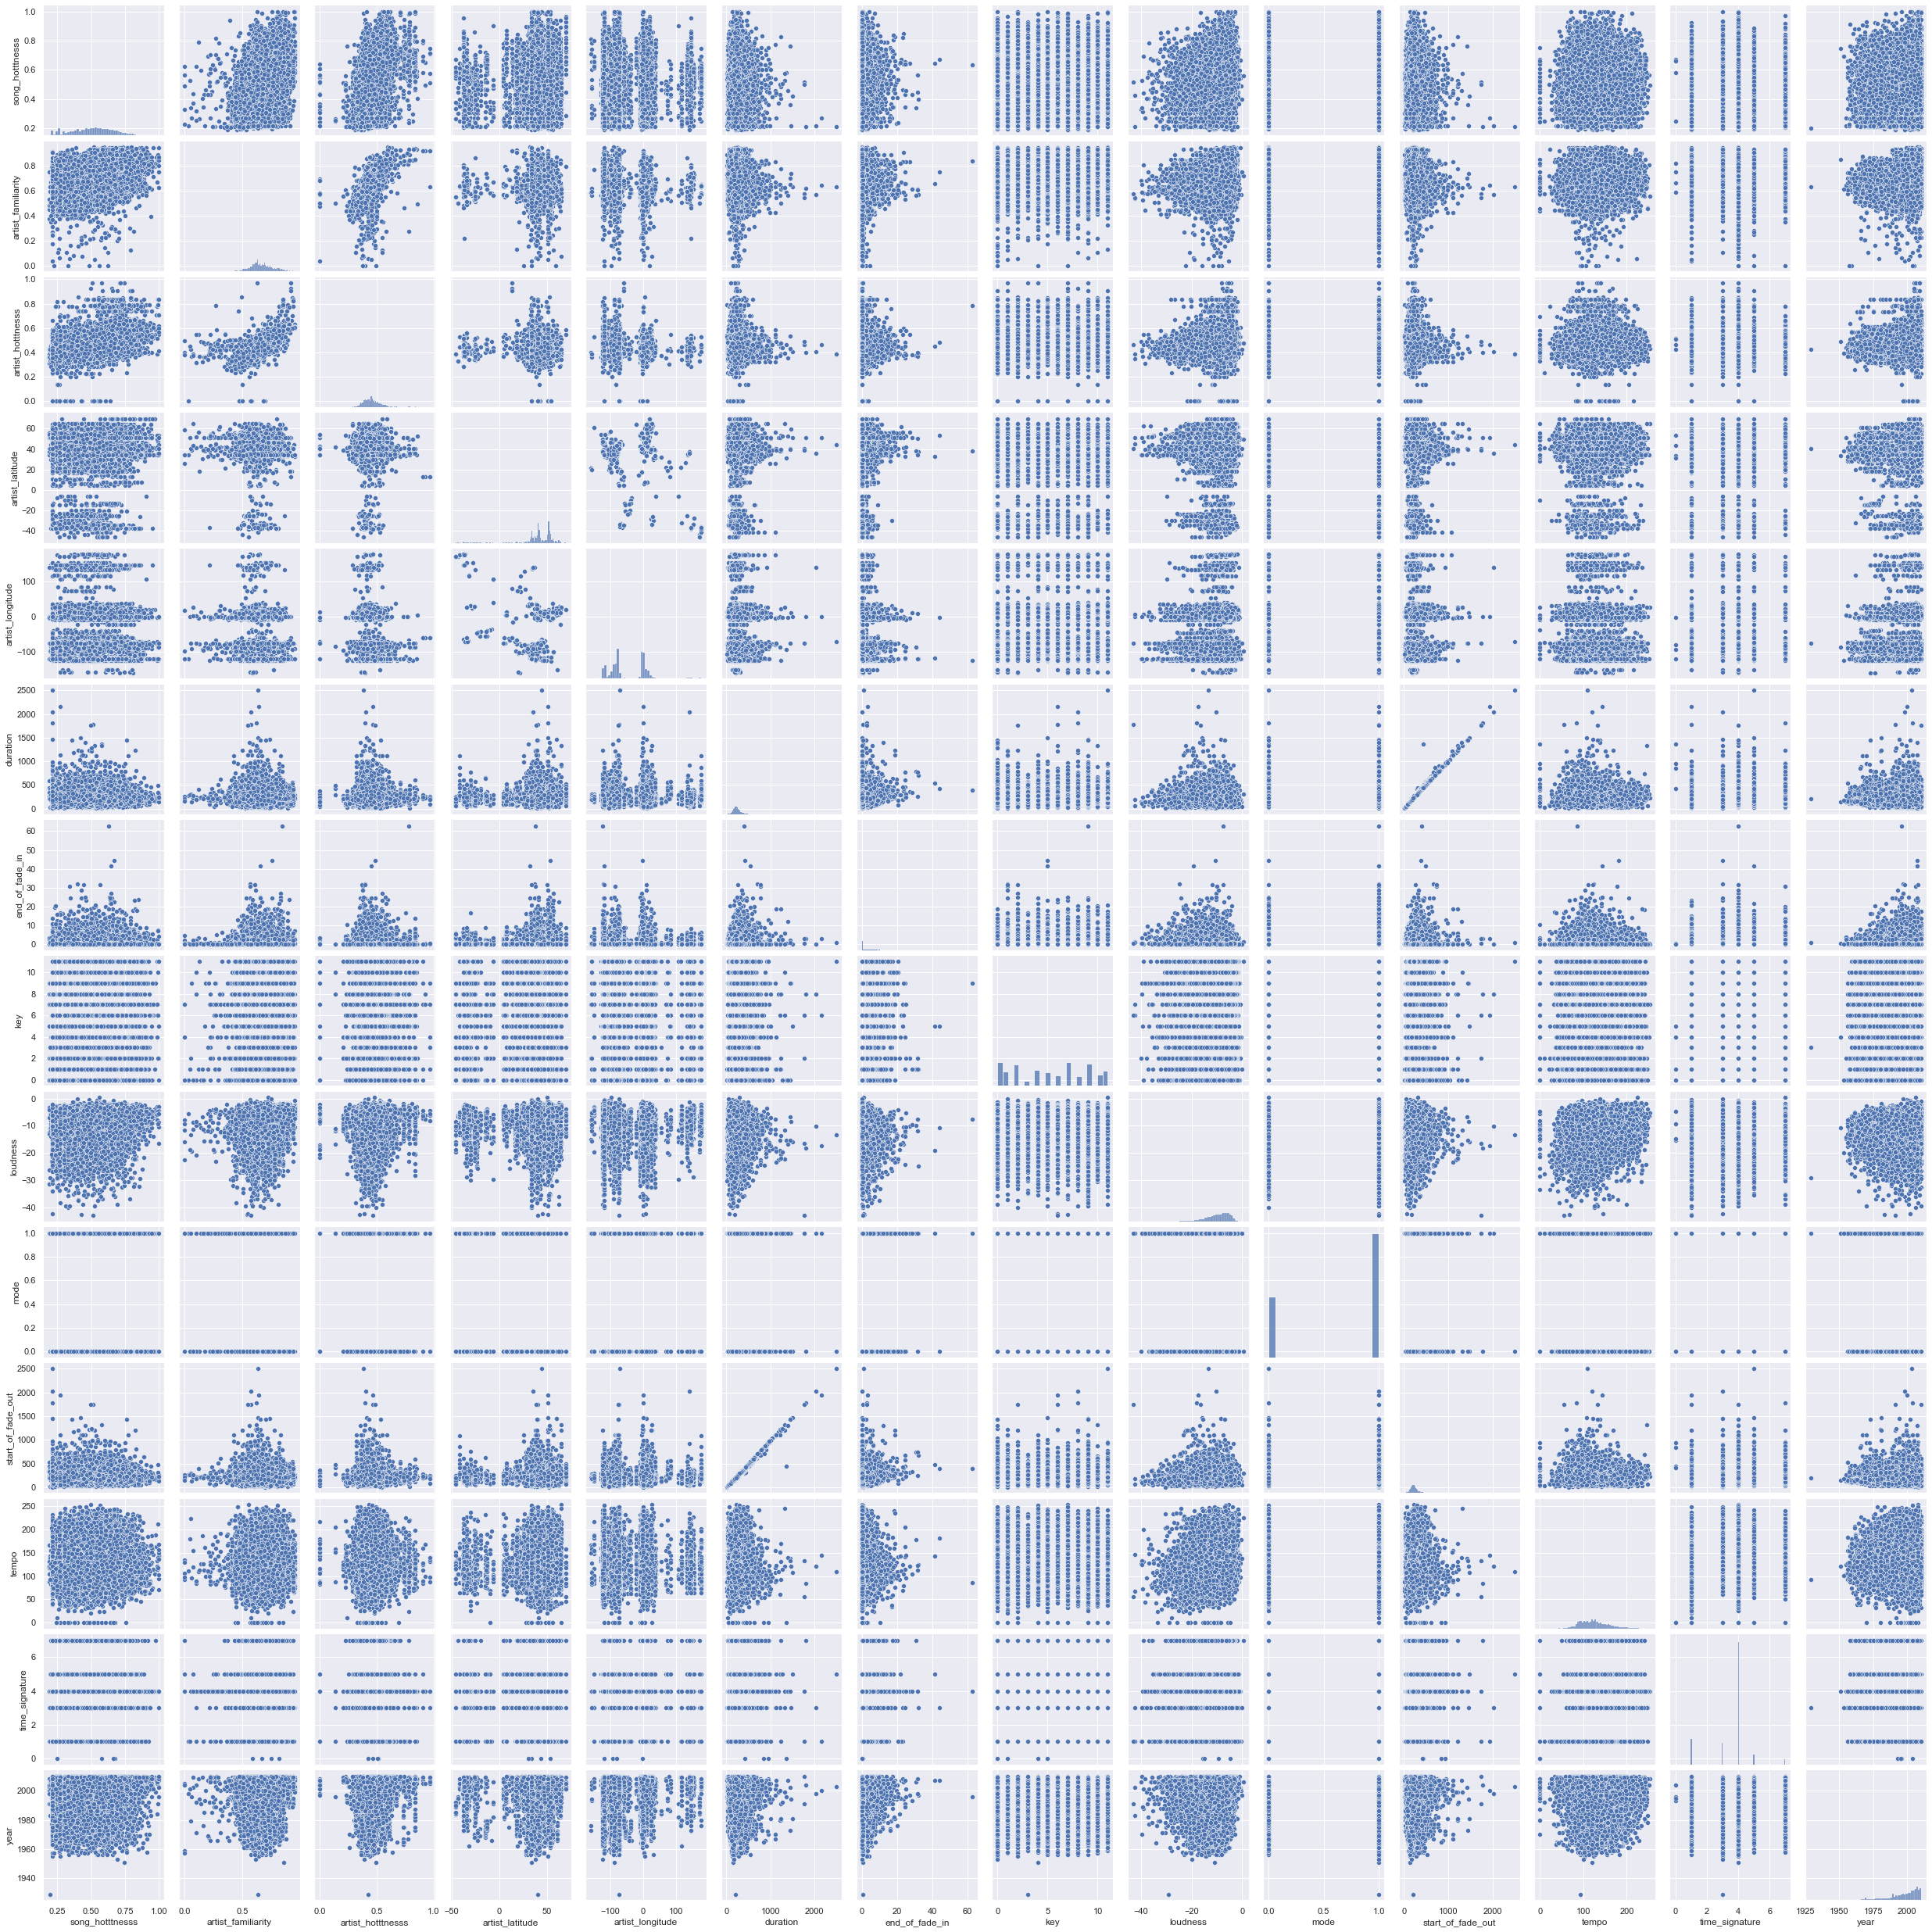

In [117]:
sns.set()
cols = ['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_latitude', 'artist_longitude', 'duration', 'end_of_fade_in', 'key', 'loudness', 'mode', 'start_of_fade_out', 'tempo', 'time_signature', 'year']
sns.pairplot(df[cols], height = 2.5)
plt.show();

In [89]:
import geopandas as gpd

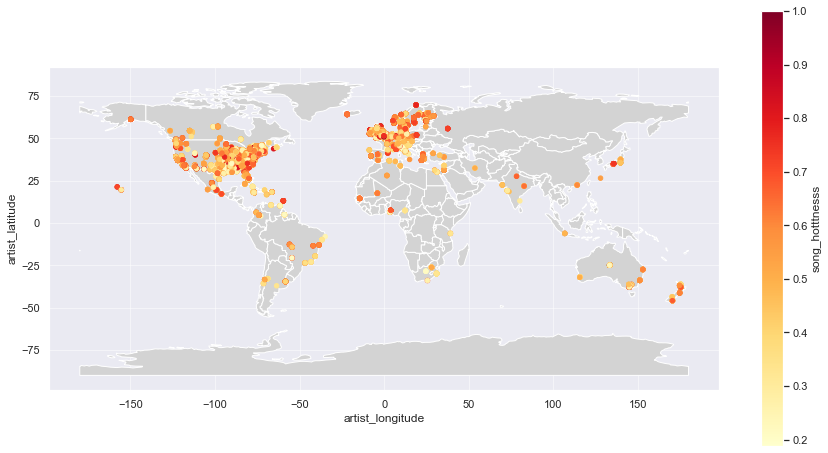

In [123]:
# initialize an axis
fig, ax = plt.subplots(figsize=(15,8))

# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres")).plot(color="lightgrey",
                                                 ax=ax)

# plot points
df.plot(x="artist_longitude", y="artist_latitude", kind="scatter", 
        c="song_hotttnesss", colormap="YlOrRd",  
        ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)
plt.show()